In [1]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.2'

from algorithms.utils import restore_state_multi_agent
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

2025-04-16 10:17:22.357508: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744791442.372228   18727 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744791442.376717   18727 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents/server_15-16/in_act_too/20250416_051224_bat_net_type_asymmetric_actor_critic_rec_net_type_asymmetric_actor_critic_lr_bat_5e-05_lr_REC_cosine_tot_timesteps_7008000_lr_sched_cosine_multiagent'

networks_batteries, network_rec, config, world_metadata, train_info, val_info = restore_state_multi_agent(directory)

{'ACTIVATION': 'tanh', 'BATTERY_ACTION_SPACE_SIZE': 1, 'BATTERY_NUM_SEQUENCES': 8, 'BATTERY_OBSERVATION_SPACE_SIZE_ACT': 13, 'BATTERY_OBSERVATION_SPACE_SIZE_ONLY_CRI': 0, 'BATTERY_OBS_IS_NORMALIZABLE': (True, False, True, True, True, True, True, True, False, False, False, False), 'CLIP_EPS': 0.2, 'DEBUG': False, 'ENT_COEF_BATTERIES': 0.0, 'ENT_COEF_REC': 0.0, 'ENV_NAME': None, 'ENV_TYPE': 'normal', 'FRACTION_DYNAMIC_LR_BATTERIES': 1.0, 'FRACTION_DYNAMIC_LR_REC': 1.0, 'GAE_LAMBDA': 0.98, 'GAMMA': 0.99, 'LOGISTIC_FUNCTION_TO_ACTOR': False, 'LR_BATTERIES': 5e-05, 'LR_BATTERIES_MIN': 1e-07, 'LR_REC': 0.0005, 'LR_REC_MIN': 1e-06, 'LR_SCHEDULE': 'cosine', 'LSTM_ACTIVATION': 'tanh', 'LSTM_NET_ARCH': (24, 12), 'MAX_ACTION_RANDOM_AGENTS': 2.0, 'MAX_GRAD_NORM': 0.5, 'MINIBATCH_SIZE_BATTERIES': 1024, 'MINIBATCH_SIZE_REC': 1024, 'NETWORK_TYPE_BATTERIES': 'asymmetric_actor_critic', 'NETWORK_TYPE_REC': 'asymmetric_actor_critic', 'NET_ARCH_BATTERIES': (64, 32, 16), 'NON_SHARED_NET_ARCH_AFTER': (64, 3

In [3]:
config

{'ACTIVATION': 'tanh',
 'BATTERY_ACTION_SPACE_SIZE': 1,
 'BATTERY_NUM_SEQUENCES': 8,
 'BATTERY_OBSERVATION_SPACE_SIZE_ACT': 13,
 'BATTERY_OBSERVATION_SPACE_SIZE_ONLY_CRI': 0,
 'BATTERY_OBS_IS_NORMALIZABLE': (True,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  False),
 'CLIP_EPS': 0.2,
 'DEBUG': False,
 'ENT_COEF_BATTERIES': 0.0,
 'ENT_COEF_REC': 0.0,
 'ENV_NAME': None,
 'ENV_TYPE': 'normal',
 'FRACTION_DYNAMIC_LR_BATTERIES': 1.0,
 'FRACTION_DYNAMIC_LR_REC': 1.0,
 'GAE_LAMBDA': 0.98,
 'GAMMA': 0.99,
 'LOGISTIC_FUNCTION_TO_ACTOR': False,
 'LR_BATTERIES': 5e-05,
 'LR_BATTERIES_MIN': 1e-07,
 'LR_REC': 0.0005,
 'LR_REC_MIN': 1e-06,
 'LR_SCHEDULE': 'cosine',
 'LSTM_ACTIVATION': 'tanh',
 'LSTM_NET_ARCH': (24, 12),
 'MAX_ACTION_RANDOM_AGENTS': 2.0,
 'MAX_GRAD_NORM': 0.5,
 'MINIBATCH_SIZE_BATTERIES': 1024,
 'MINIBATCH_SIZE_REC': 1024,
 'NETWORK_TYPE_BATTERIES': 'asymmetric_actor_critic',
 'NETWORK_TYPE_REC': 'asymmetric_actor_critic',
 'NET_ARCH_BATTERIES

In [4]:
world_metadata

WorldMetadata(world_train={'num_battery_houses': 3, 'battery_observations': ['demand', 'generation', 'temperature', 'soc', 'day_of_year', 'seconds_of_day', 'selling_price', 'buying_price', 'network_REC_plus', 'network_REC_minus'], 'rec_observations': ['demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_base_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'day_of_year', 'seconds_of_day', 'network_REC_plus', 'network_REC_minus', 'rec_actions_prev_step'], 'demand': {'path': 'ernestogym/ernesto_jax/data/demand/rse_profiles_train.csv', 'timestep': 3600, 'test_profiles': None, 'data_usage': 'end'}, 'generation': {'path': {'battery_houses_generation': ['ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_-60deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_0deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Time

In [5]:
jax.tree.map(lambda x: jnp.isnan(x).any(axis=jnp.arange(1, x.ndim)), train_info)

{'actions': {'REC_agent': Array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fal

In [6]:
jax.tree.map(lambda x: x.shape, val_info)

{'actions_batteries': (22, 43350, 3),
 'actions_rec': (22, 43350, 3),
 'balance_minus': (22, 43350),
 'balance_plus': (22, 43350),
 'buy_prices': (22, 43350, 3),
 'demands': (22, 43350, 3),
 'dones': {'REC_agent': (22, 43350),
  '__all__': (22, 43350),
  'battery_agent_0': (22, 43350),
  'battery_agent_1': (22, 43350),
  'battery_agent_2': (22, 43350)},
 'energy_to_batteries': (22, 43350, 3),
 'generations': (22, 43350, 3),
 'norm_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': (22, 43350, 3),
  'r_glob': (22, 43350, 3),
  'r_op': (22, 43350, 3),
  'r_trad': (22, 43350, 3)},
 'pure_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': (22, 43350, 3),
  'r_glob': (22, 43350, 3),
  'r_op': (22, 43350, 3),
  'r_trad': (22, 43350, 3)},
 'r_tot': (22, 43350, 3),
 'rec_reward': (22, 43350),
 'self_consumption': (22, 43350),
 'sell_prices': (22, 43350, 3),
 'soc': (22, 43350, 3),
 'soh': (22, 43350, 3),
 'tot_incentives': (22, 43350),
 'weig_reward': {'r_clipping': (22, 43350, 3),
  'r_deg': 

In [7]:
val_info['r_tot'].shape #.sum(axis=(1, 2)).shape

(22, 43350, 3)

In [8]:
lim = config['NUM_RL_AGENTS'] if 'NUM_RL_AGENTS' in config.keys() else config['NUM_BATTERY_AGENTS']
a = val_info['r_tot'][..., :lim].sum(axis=(1, 2))
a

array([-4026.7468, -3184.6292, -2766.1318, -2536.7124, -2458.6338,
       -2409.7446, -2393.144 , -2405.3386, -2379.9983, -2380.2783,
       -2378.4797, -2384.6238, -2400.8376, -2409.692 , -2419.5137,
       -2447.6362, -2455.7603, -2492.829 , -2523.722 , -2536.8967,
       -2546.58  , -2559.7185], dtype=float32)

In [9]:
val_info['r_tot'].shape

(22, 43350, 3)

In [10]:
val_info['r_tot'][7, :].sum(axis=0)

array([-819.21625, -760.1649 , -825.95233], dtype=float32)

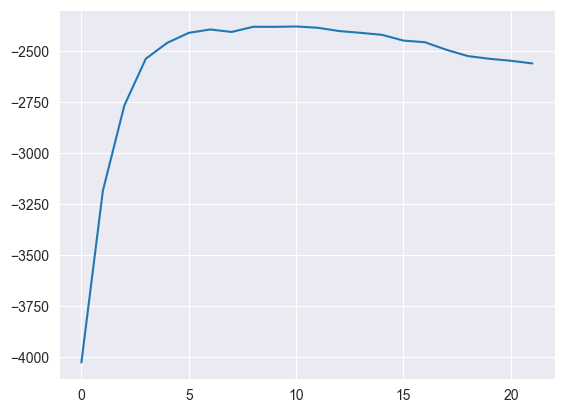

In [11]:
plt.plot(a)

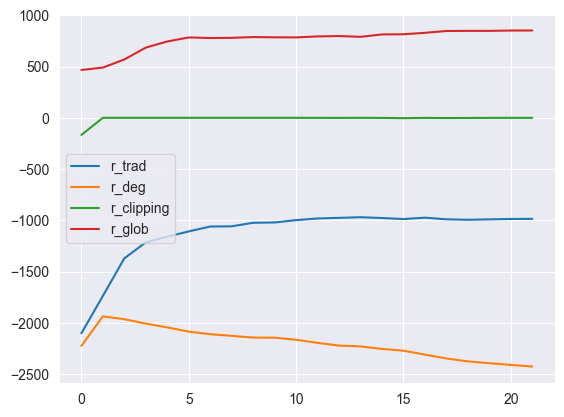

In [12]:
plt.plot(val_info['weig_reward']['r_trad'][..., :lim].sum(axis=(1, 2)), label='r_trad')
plt.plot(val_info['weig_reward']['r_deg'][..., :lim].sum(axis=(1, 2)), label='r_deg')
plt.plot(val_info['weig_reward']['r_clipping'][..., :lim].sum(axis=(1, 2)), label='r_clipping')
plt.plot(val_info['weig_reward']['r_glob'][..., :lim].sum(axis=(1, 2)), label='r_glob')
plt.legend()

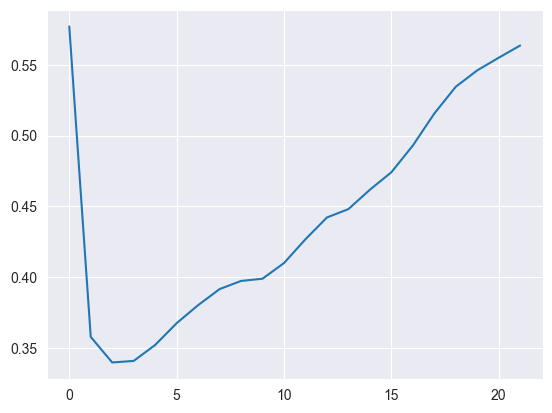

In [13]:
plt.plot(val_info['soc'][..., :lim].mean(axis=(1, 2)))

In [14]:
val_info['rec_reward'].sum(axis=1)

array([5036476. , 5292995.5, 6162265.5, 7431670. , 8082193. , 8510754. ,
       8440400. , 8453825. , 8539565. , 8507357. , 8495670. , 8594051. ,
       8629167. , 8552544. , 8800286. , 8816447. , 8972349. , 9165353. ,
       9180074. , 9182672. , 9216468. , 9222386. ], dtype=float32)

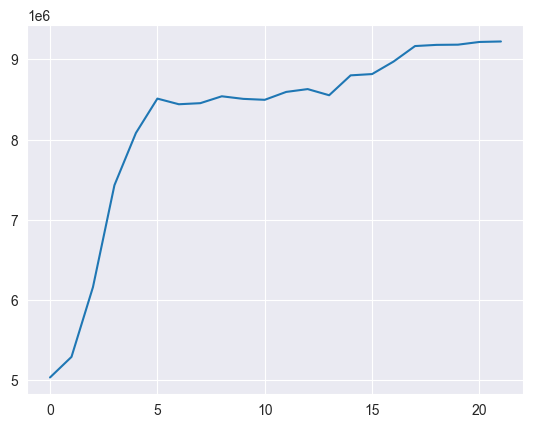

In [15]:
plt.plot(val_info['rec_reward'].sum(axis=1))

In [16]:
np.var(val_info['actions_rec'], axis=-1).shape

(22, 43350)

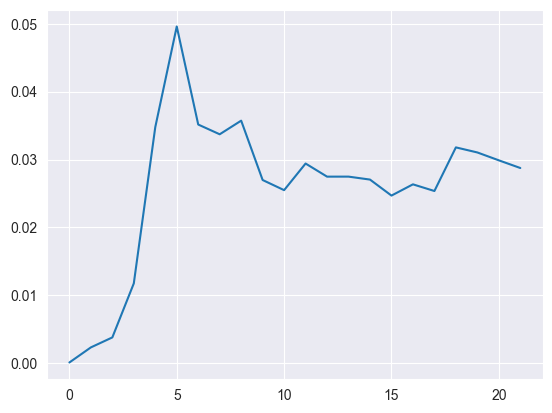

In [17]:
plt.plot(np.var(val_info['actions_rec'], axis=-1).mean(axis=1))

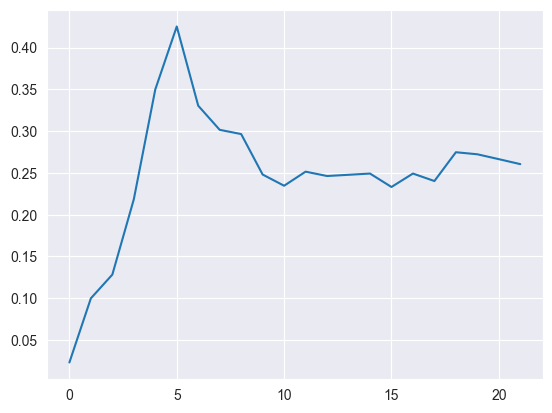

In [18]:
plt.plot(np.mean(np.max(val_info['actions_rec'], axis=-1) - np.min(val_info['actions_rec'], axis=-1), axis=1))